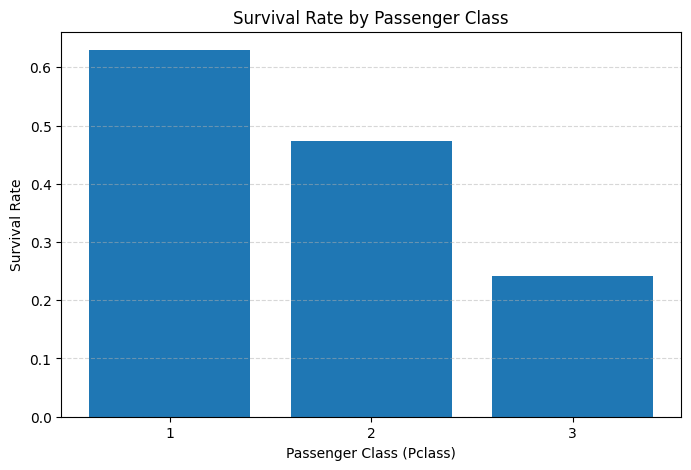

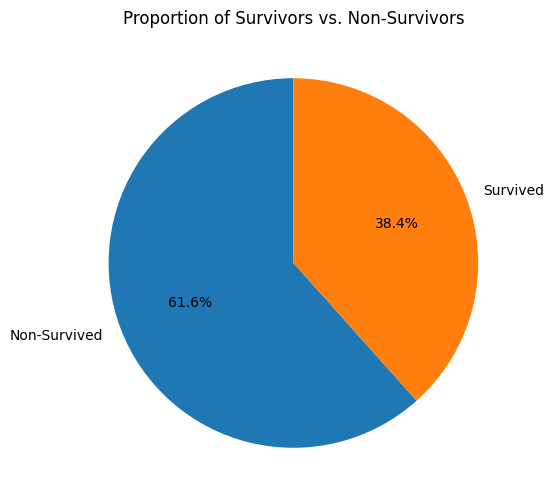

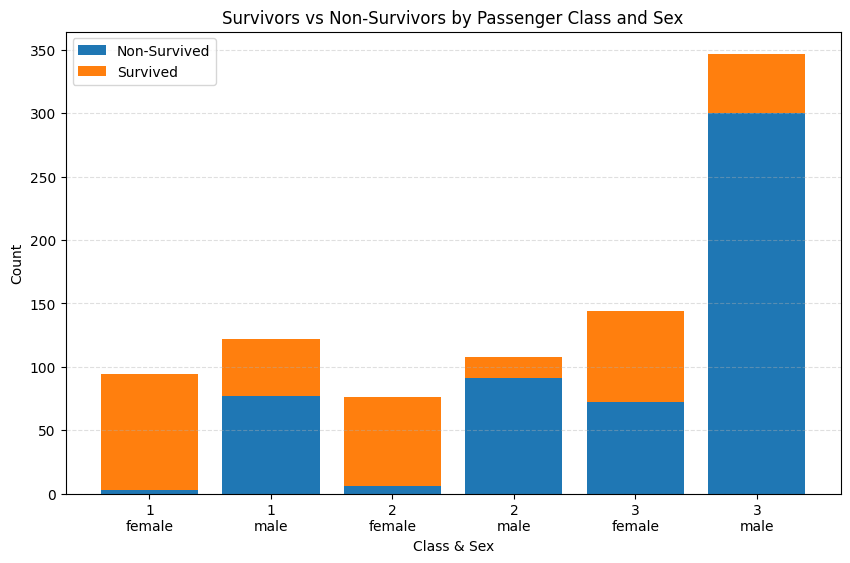

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

# 1. Bar Chart — Survival Rate by Passenger Class (Pclass)
survival_rate = df.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(8,5))
plt.bar(survival_rate.index, survival_rate.values)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Survival Rate")
plt.xticks([1, 2, 3])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# 2. Pie Chart — Survivors vs Non-Survivors
survival_counts = df['Survived'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    survival_counts,
    labels=["Non-Survived", "Survived"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Proportion of Survivors vs. Non-Survivors")
plt.show()

# 3. Stacked Bar Chart — Survivors vs Non-Survivors by Pclass & Sex
stack_data = df.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
x_labels = [f"{cls}\n{sex}" for cls, sex in stack_data.index]
plt.bar(x_labels, stack_data[0], label="Non-Survived")
plt.bar(x_labels, stack_data[1], bottom=stack_data[0], label="Survived")
plt.title("Survivors vs Non-Survivors by Passenger Class and Sex")
plt.xlabel("Class & Sex")
plt.ylabel("Count")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


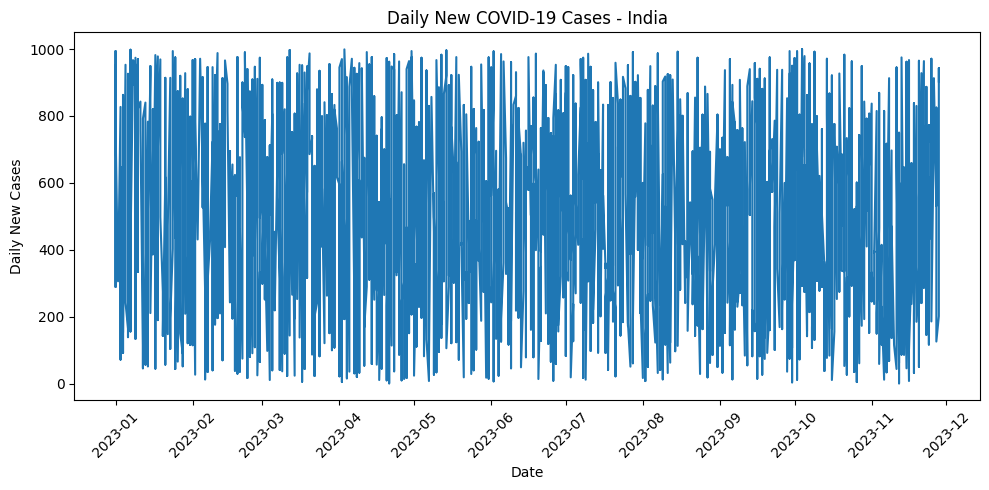

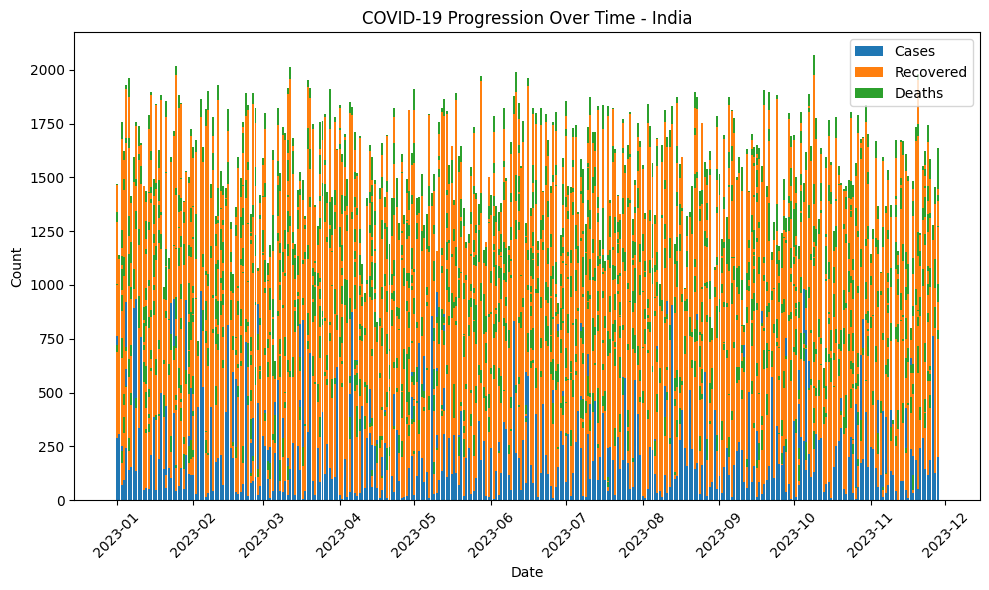

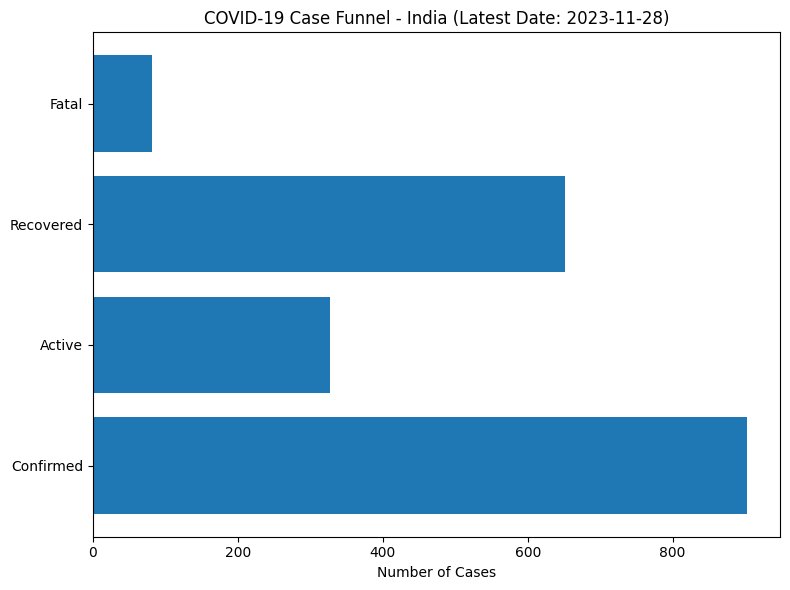

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read your file (change name if needed)
df = pd.read_csv("India_covid_data.csv")

# Convert Date (now in format YYYY-MM-DD)
df['Date'] = pd.to_datetime(df['Date'])

# Filter for India and sort by date
country = "India"
data = df[df['Country'] == country].sort_values("Date")

# -----------------------------
# 1) Line chart – Daily new cases (Cases column)
# -----------------------------
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Cases'])
plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.title(f"Daily New COVID-19 Cases - {country}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------
# 2) Stacked bar chart – Cases, Recovered, Deaths over time
# -----------------------------
plt.figure(figsize=(10, 6))

plt.bar(data["Date"], data["Cases"], label="Cases")
plt.bar(data["Date"], data["Recovered"],
        bottom=data["Cases"], label="Recovered")
plt.bar(data["Date"], data["Deaths"],
        bottom=data["Cases"] + data["Recovered"],
        label="Deaths")

plt.xlabel("Date")
plt.ylabel("Count")
plt.title(f"COVID-19 Progression Over Time - {country}")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------
# 3) Funnel chart – Confirmed, Active, Recovered, Fatal (latest date)
# -----------------------------
latest = data.iloc[-1]

confirmed = latest["Cases"]
active = latest["Active"]          # you already have Active in the file
recovered = latest["Recovered"]
fatal = latest["Deaths"]

funnel_values = [confirmed, active, recovered, fatal]
funnel_labels = ["Confirmed", "Active", "Recovered", "Fatal"]

plt.figure(figsize=(8, 6))
plt.barh(funnel_labels, funnel_values)
plt.title(f"COVID-19 Case Funnel - {country} (Latest Date: {latest['Date'].date()})")
plt.xlabel("Number of Cases")
plt.tight_layout()
plt.show()
